## 3. Figures
There is a very large number of parameters for the plots, we will not go through them all here but we will some of them along this course.

Now, calling the plot function directly from matplotlib can sometimes be convenient but it has some disadvantages.
One of the main disadvantages is that all the parameters that are not specified are filled with default values.
For example, the size of the figure.

Another way to create a figure in a more explicit way is the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

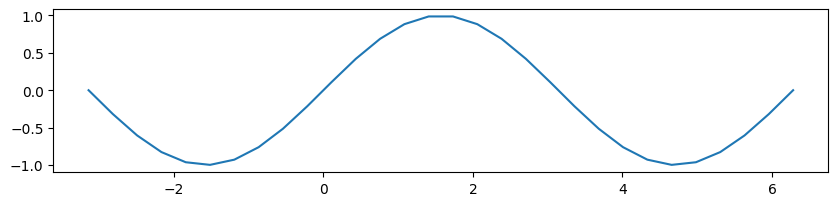

In [2]:
X = np.linspace(-np.pi, 2 * np.pi, 30)
Y = np.sin(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(aspect=1)
ax.plot(X, Y)

In the previous cell, the command:
```python
fig = plt.figure(figsize=(10, 8))
```
creates our figure with a size of 10 by 8.
Then, we create a subplot that we store in the variable `ax` with a forced aspect ratio of `1` with the line
```python
ax = fig.add_subplot(aspect=1)
```
Then, we plot our figure with the usual command `plot` but directly in the axis that we created.

We can write the previous line in a slightly more compact way as follow:

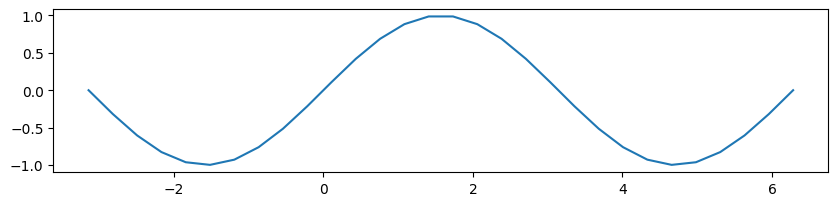

In [3]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"aspect": 1})
ax.plot(X, Y)

It is then possible to access many parameters of the subplot `ax` in the figure `fig`.
For example, we can change the minimum and maximum value of the `x` axis with `ax.set_xlim`, change the label of the `y` axis with `ax.set_ylabel`:

Text(0, 0.5, 'Values')

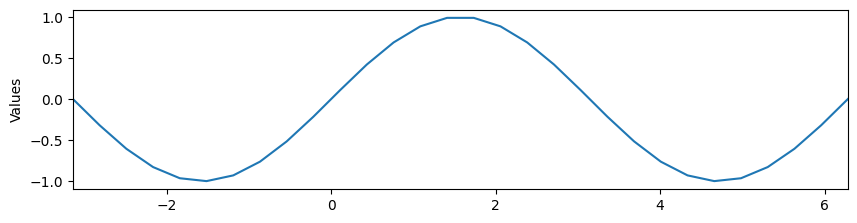

In [4]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"aspect": 1})
ax.plot(X, Y)
ax.set_xlim(-np.pi, 2 * np.pi)
ax.set_ylabel("Values")

The figures generated by matplotlib have a very specific organisation that is good to keep in mind when one wants to precisely build a plot, here is its anatomy (this is taken from Nicolas Rougier's book, [there](https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py), note that this is a figure that was created with matplotlib, not a image that already exist.):

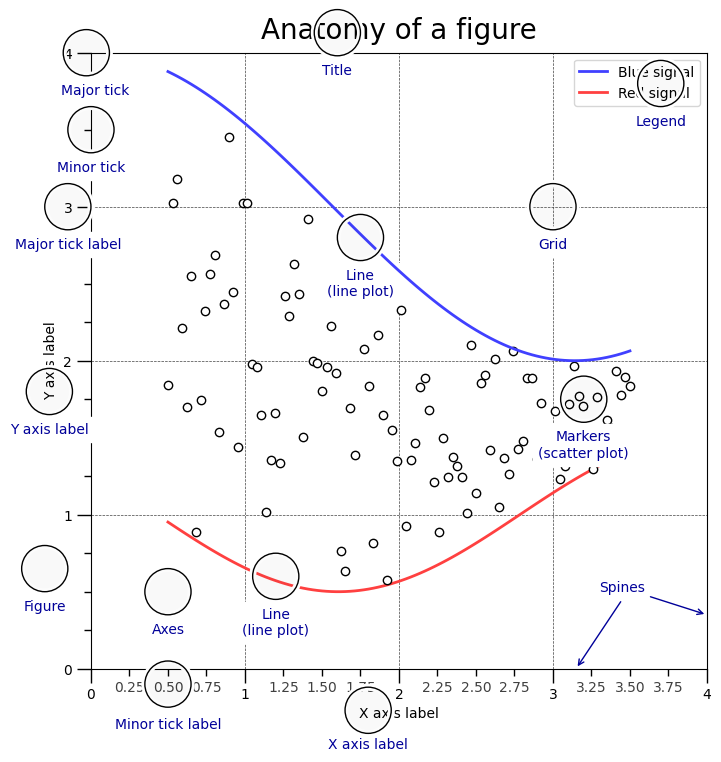

In [5]:
from centuri_course import run_anatomy

run_anatomy()

You can find the code to create such a plot in the folder `2-Data-handling-and-visu/Resources/anatomy.py`.

## Exercise 1
Using the previous data and with the help of the previous figure, build a plot that is fully "legended".

In [6]:
# Do that here

> Side note, it is sometimes useful to have access to mathematical characters, for example to display units. Matplotlib allows to do that using the [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating:
>
> You can put a `r` before the string and use the usual [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating like that for example:

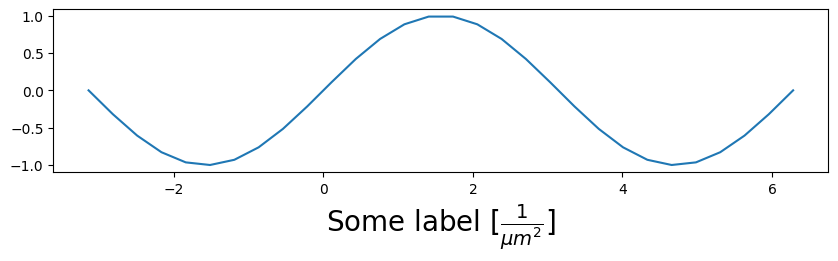

In [7]:
X = np.linspace(-np.pi, 2 * np.pi, 30)
Y = np.sin(X)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"aspect": 1})
ax.plot(X, Y)
ax.set_xlabel(r"Some label $[\frac{1}{\mu m^2}]$", size=20);

## 4. Multiple subplots/axis

If you want to display multiple plots within the same figure, it is of course possible too. The `plt.subplots` parameters `nrows` and `ncols` are there for that:

(3, 2)


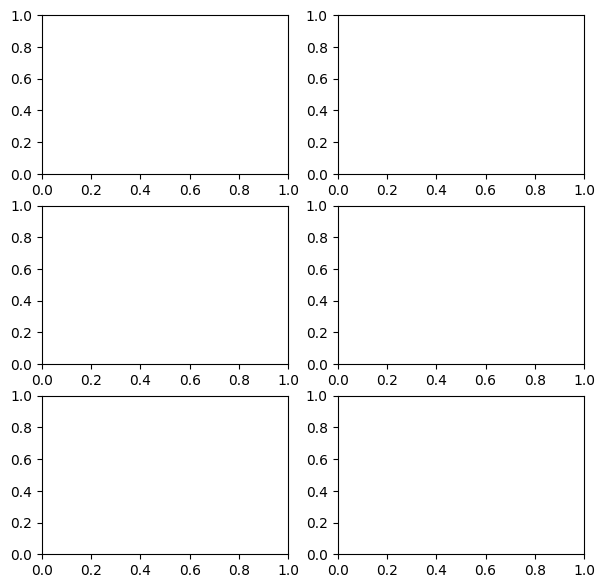

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
print(ax.shape)

Now, let's say that we have two time series recorded at two different times `X1` and `X2`. We can plot them under each other to compare them:

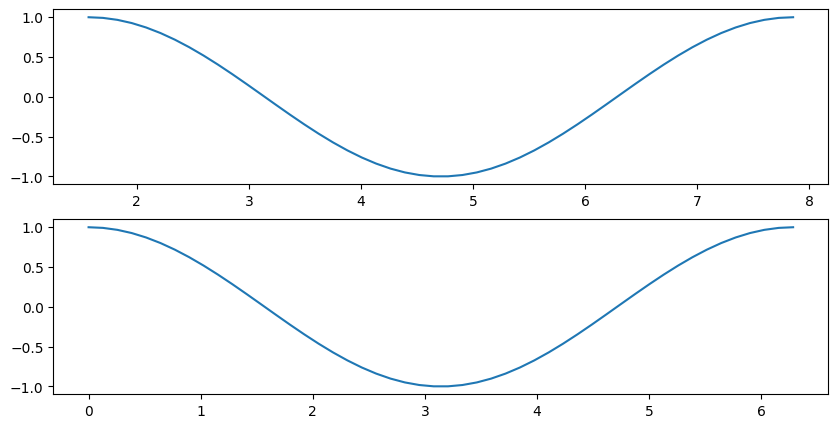

In [9]:
X1 = np.linspace(np.pi / 2, 5 * np.pi / 2)
X2 = np.linspace(0, 2 * np.pi)
Y1 = np.sin(X1)
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, "-")
ax[1].plot(X2, Y2, "-")

The problem here is that the two curves look similar because they are plotted on a different `x` axis. There would be multiple ways to make different curves look similar using different `x` or `y` minimum and maximum values:

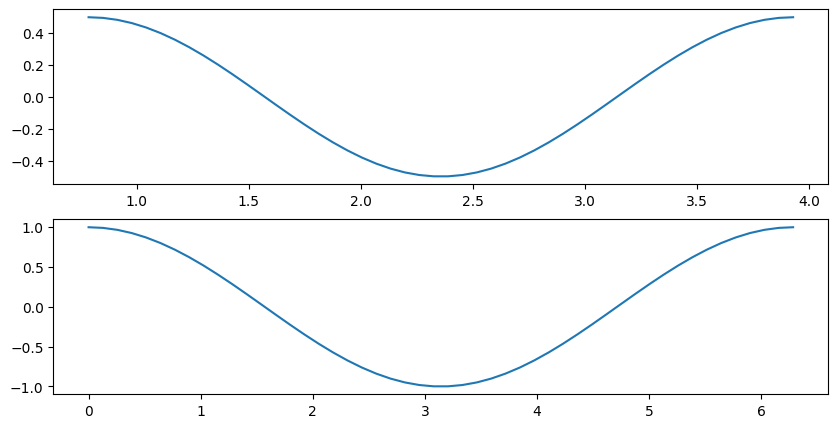

In [10]:
X1 = np.linspace(np.pi / 4, 5 * np.pi / 4)
X2 = np.linspace(0, 2 * np.pi)
Y1 = np.sin(X1 * 2) / 2
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, "-")
ax[1].plot(X2, Y2, "-")

In order to keep the `x` and `y` axis similar across subplots, one can either do it manually using the `ax.set_xlim` or `ax.set_ylim` functions or one can use the `sharex` and `sharey` parameters:

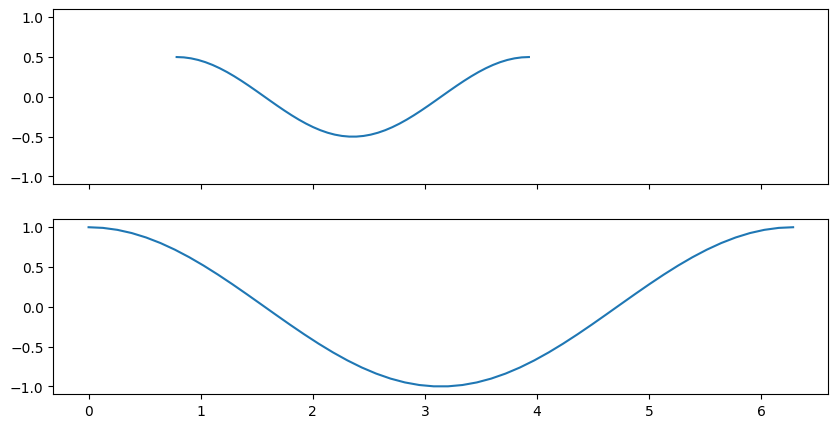

In [11]:
X1 = np.linspace(np.pi / 4, 5 * np.pi / 4)
X2 = np.linspace(0, 2 * np.pi)
Y1 = np.sin(X1 * 2) / 2
Y2 = np.cos(X2)

fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 5), sharex=True, sharey=True
)
ax[0].plot(X1, Y1, "-")
ax[1].plot(X2, Y2, "-")

Another way to ensure that the two curves are comparable, it is also possible to plot them on the same graph:

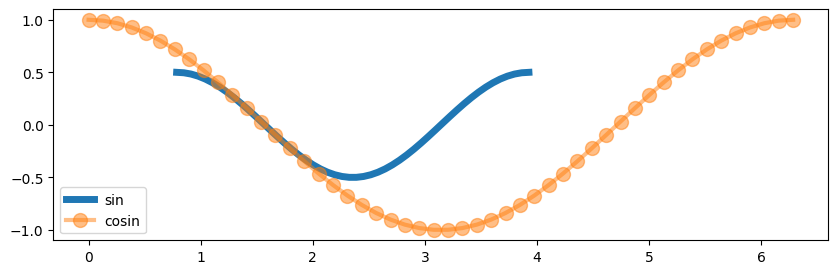

In [12]:
X1 = np.linspace(np.pi / 4, 5 * np.pi / 4)
X2 = np.linspace(0, 2 * np.pi)
Y1 = np.sin(X1 * 2) / 2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(X1, Y1, "-", label="sin", lw=5)
ax.plot(X2, Y2, "-o", label="cosin", lw=3, ms=10, alpha=0.5)
ax.legend()

It is also possible to fill below a curve or between two curves using the function `ax.fill_between`:

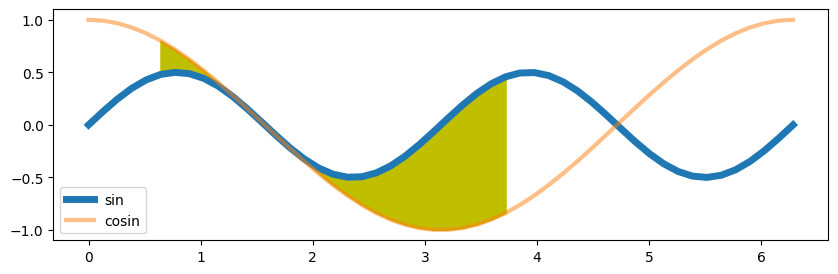

In [13]:
X1 = np.linspace(0, 2 * np.pi)
X2 = np.linspace(0, 2 * np.pi)
Y1 = np.sin(X1 * 2) / 2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(X1, Y1, "-", label="sin", lw=5)
ax.plot(X2, Y2, "-", label="cosin", lw=3, alpha=0.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color="y")
ax.legend()